<div class="h1"><i><center>Capstone - University of Michigan</center></i></div>

<div class="h2"><i>1.&ensp; Abstract</i></div>  


While there exist numerous studies investigating real estate globally, we were drawn to analyzing Singapore’s resale market for HDB flats which form a natural experiment that enabled us to better isolate and study the effects of location, and location features, on housing values. Across flat types, HDB flats generally have similar sizes, layouts and features, yet we observe significantly varying transaction values. We also observed some of the more expensive resale transactions occurring on older units with shorter remaining leases, running counter to our expectations on leases and depreciation.



<div>
<img src="https://github.com/mcmanus-git/Singapore-HDB/raw/main/tom/final_images/typical_four_room_plan.jpg" width="600">
<figcaption align = "left"><i>Example of a typical 4-room Singapore Flat [1]</i></figcaption>
</div>
    



Pricing then becomes a key challenge for potential buyers and sellers of HDB resale flats with limited information beyond past transactions and the advice of property agents with potentially skewed incentives (commissions are typically % of transaction value). The goal of our project, [HDBestimate](https://hdb-estimate.herokuapp.com/), looks to demystify pricing by creating location features and training machine-learning models to predict prices, accounting for these location features. We hypothesize that beyond inherent flat features, location features play a significant role in influencing prices, and we hope to not only provide predictions on price but to also identify how location and different location features actually influence the price of an HDB resale flat.

We explored and examined various factors which included the creation of a large amount of geospatial features used as additional inputs used to accurately predict the flat resale value, and display this information in a clean and highly functional user interface.



<br>

<div class="h2"><i>2.&ensp; Background</i></div>  



Singapore has emerged as one of the world’s most prosperous countries. In addition to being a financial center, it's an achievement in urban planning and serves as a model for developing nations. It is consistently ranked as one of the most livable cities in the world, and a large part of this is due to its intriguing housing development strategy. 
 
**History** - In 1960 the Singapore Housing and Development Board (HDB) was formed to provide affordable and high-quality housing for residents of this city-state nation. Housing is issued by the state on 99-year leaseholds.

Public housing in Singapore is currently subsidized, built, and managed by the Government of Singapore. Singapore has one of the world’s highest home ownership rates. More than 80% of the 5.8M population live in Housing Development Board (HDB) apartments, **commonly known as HDB flats**.  More than 90% of Singaporeans in public housing own the apartment they live in. The government subsidizes the cost of new homes, and buyers can get loans from the HDB, along with a 10% down payment. Singapore’s housing estates are considered mixed-income developments.  




<img align="center" width="700" height="100" src="https://www.researchgate.net/publication/329910161/figure/fig1/AS:707705744392193@1545741606532/Example-of-Singapores-public-housing-HDB-2.jpg">
<figcaption align = "left"><i>Example of a Singapore HDB Housing Complex [2]</i></figcaption>





<img align="center" width="600" height="100" src="https://static1.straitstimes.com.sg/s3fs-public/styles/large30x20/public/articles/2019/08/06/nm-hdbresale-0608.jpg">
<figcaption align = "left"><i>HDB Flats vary on which storey they are located [3]</i></figcaption>

    
    

With more than 1 million flats spread across 24 towns and 3 estates, Singapore’s housing is uniquely different; as of 2022, a **significant** portion of Singapore residents live in public housing…  

<div class="h2"><i>3.&ensp; Data Used</i></div>  


<div class="h3"><i>Primary Baseline Data</i></div>  


The primary sets of data utilized for the project included Singapore's HDB  *Resale Flat Prices* (Resale transacted prices), and are currently published by the Singapore Housing and Development Board (HDB) and updated on a weekly basis.  
* Source:  Data can be found here (https://data.gov.sg/dataset/resale-flat-prices)
* Range: Dataset extends from January 1990 through present-day. 
* Baseline dataset consisted of five core data files, covering five time series ranges:  1990-1999, 2000-2012, 2012-2014, 2015-2016, 2017-present day.  These files were merged into one consolidated master dataset and imported for analysis.  
* **Features from this consolidated set include**:  
   * *month* &ensp; (the month/year of the resale transaction)
   * *town* &ensp; (the Singapore town of the actual flat)
   * *block* &ensp;  (the address component of the flat)
   * *street name* &ensp; (the physical street address)
   * *flat type* &ensp;  (the category of flat including room count)
   * *floor area* &ensp; (flat's square meter surface floor area)
   * *flat model* &ensp; (category of flat by model)
   * *lease commence data*  &ensp; (the year the flat was commenced)
   * *storey range* &ensp; (the range of the flat storey/floor level, e.g. '04 to 06' identifying the flat was in the range between the fourth and sixth storey)
   * *remaining lease* &ensp; (the remaining years and months of the 99-year lease)
   * *resale price* &ensp; (price sold for in Singapore dollars, and a major feature of this dataset we will be trying to predict). 
   
* All [towns](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/the_towns.png) were detailed and later plotted against various resale pricing data
* Region breakout shown [here](https://upload.wikimedia.org/wikipedia/commons/9/98/Singapore_Planning_Regions.png)
* Remaining lease:  the number of years left before the lease ends; this information is computed as at the resale flat application
* Resale Price:  these should be taken as indicative only as the resale prices agreed between buyers and sellers; these are dependent on many factors which we will explore. 
* Remember, lease left refers to the number of years to the expiry of the 99-year lease; after which, ownership of the HDB will return to the government.  This is a very different concept than what is done in the United States. 

* **Total Transaction Observations**:  867,677 number of rows, covering 11,747 days 



<br>

*Below are the baseline features from the Singapore HDB Resale Pricing Dataset:*

<style type="text/css">@media screen and (max-width: 767px) {.tg {width: auto !important;}.tg col {width: auto !important;}.tg-wrap {overflow-x: auto;-webkit-overflow-scrolling: touch;}}</style><div class="tg-wrap"><table style="border-collapse:collapse;border-spacing:0;table-layout: fixed; width: 746px" class="tg"><colgroup><col style="width: 90px"><col style="width: 173px"><col style="width: 180px"><col style="width: 303px"></colgroup><thead><tr><th style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:12px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Feature</span></th><th style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:12px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Name</span></th><th style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:12px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Title</span></th><th style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:12px;font-weight:bold;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Description</span></th></tr></thead><tbody><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">1</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">month</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Month</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Timestamp of resale transaction</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">2</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">town</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Town</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Name of Singapore town</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">3</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">flat_type</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Flat type</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Category of HDB flat type</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">4</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">block</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Block</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Address block of HDB flat</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">5</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">street_name</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Street name</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Singapore street name of flat</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">6</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">storey_range</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Storey range</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Range of stories the flat was hosted</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">7</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">floor_area_sqm</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Floor area sqm</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Floor area of the flat in surface face area </span><br><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">(square-meters)</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">8</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">flat_model</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Flat model</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Category of HDB flat model</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">9</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">lease_commence_date</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Lease commence date</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Lease commence data (historical)</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">10</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">remaining_lease</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Remaining lease</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Remaining lease time (year / month)</span></td></tr><tr><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">11</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">resale_price</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Resale price</span></td><td style="border-color:black;border-style:solid;border-width:1px;color:#434343;font-family:Tahoma, Geneva, sans-serif !important;font-size:11px;overflow:hidden;padding:10px 5px;text-align:center;vertical-align:top;word-break:normal"><span style="font-weight:400;font-style:normal;text-decoration:none;color:#434343;background-color:transparent">Resale Price (Singapore Dollars $)</span></td></tr></tbody></table></div>

<br>

*Example of some rows of base data: [[closeup](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/xample_rows.png)*]


<div>
<img src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/xample_rows.png" width="1200"/>
</div>



<br>


<div class="h3"><i>Secondary Data</i></div>  

    
Additional source of data included:

- HDB Resale Price Index (https://data.gov.sg/dataset/hdb-resale-price-index):  This tracked the overall price movement of the public residential market (based on stratified hedonic regression methods) and thus allowed scaling and normalization of the resale price values, taking into account factors like inflation.  (We adjusted our resale price to remove the effects thus of inflation). This was extremely important to leverage in order to allow comparison between resale values year by year. 


This index was critical for normalizing our resale pricing data, as it tracked the overall price movement of the public residential market in Singapore.  This allowed us to scale values (for instance, you see how the index of 100 was in 1996).  Index normalization factor shown below.

<br>

*Interactive HDB Resale Price Index:*

In [10]:
display.IFrame(src="https://data.gov.sg/dataset/hdb-resale-price-index/resource/52e93430-01b7-4de0-80df-bc83d0afed40/view/14c47d07-1395-4661-8466-728abce27f5f", width="1100", height="400")

<br>

<div class="h3"><i>Location-Related Data</i></div>  


<div class="h4"><i>Postal Codes and Locations</i></div>  

In order to get location for each building in Singapore, we opted to build a scraper [get_postal_codes.ipynb](https://github.com/mcmanus-git/Singapore-HDB/blob/main/stuart/get_postal_codes.ipynb) that used the onemap.sg API. Every building in Singapore is represented by a 6 digit postal code and our scraper queried one million postal codes that ranged from 000000 to 999999, storing the results into a JSON file before finally converting all the results into a dataframe which we upload into our database as the table, sg_buildings_postal. 







<div class="h4"><i>Location Specific Data</i></div>  

In addition to the baseline data, we added various location features that we believe would be useful in helping predict flat prices. Location data for each dataset was standardized to the following format:
 - **SRID:** 4326
 - **Geometries:** (Longitude, Latitude) 





List of [additional location features](https://hdb-estimate.herokuapp.com/datasets)

<div class="h4"><i>Schools</i></div>  

- Preschools
  - In addition to providing early childhood education, many preschools also double up as childcare services providing full-day care for children aged 1 to 6 years

- Primary Schools  
  - Primary education is for children aged 7 to 12 and the government’s motto is “every school is a good school”.  In reality however, some primary schools are more popular than others and as a result are frequently oversubscribed. 
  - When balloting for a spot, priority is typically given to those who live closer to the preferred schools (Source: https://www.moe.gov.sg/primary/p1-registration/distance).
  - While there are no official school rankings, we adopt a wisdom of the crowd approach and use the subscription rate (number of applications/number of spots available) as a proxy for school rankings and create a primary school score in addition to the location data.
- Secondary Schools 
  - Secondary education is for children aged 13 to 16.  Admission is based on scores attained in the Primary School Leaving Exams (PSLE) and are generally a good indication of the quality of the school.
  - Distance does not factor into admission criteria but generally we believe that people want to stay in areas with good school options.
  - There are no official rankings so we use the average PSLE score to calculate a secondary school score in addition to the location data
  
<div class="h4"><i>Transport</i></div>  


- Taxi Stands
  - While street hires are possible and occur frequently, taxi stands enable taxis to wait for passengers (and vice versa) and staying close to a taxi stand can improve one’s chances of getting a taxi
 - Bus Stops 
   - Buses represent an important mode of public transport in Singapore and they can only stop to let passengers board and alight at designated bus stops which makes these locations vital for increasing accessibility.
  - Transit Stations 
    - Mass Rapid Transit (MRT) and Light Rapid Transit (LRT) represent inter and intra town modes of public transportation within Singapore respectively.
    - Each town typically has one main MRT station while some towns are serviced additionally by an LRT system.
    - In addition to the location of each station, we create a station score based on the level of connectivity of each station. 
    - Scores were created as follows:
      - All stations start with a score of 1
      - If station is an LRT station: +0
      - If station is an MRT station: +1
      - For every line the station connects to: +1
      - Downloadable rail map [here](https://www.lta.gov.sg/content/dam/ltagov/getting_around/public_transport/rail_network/pdf/tel2_sm-20-03-en-exp.pdf)





<img align="center" width="900" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/closeup_rail_map.png">
<figcaption align = "left"><i>MRT Rail System Map [4]</i></figcaption>



   - Transit Station Exit
     - As most transit stations are either underground or above ground, the locations of the station entrances and exits are indicative of accessibility in addition to the actual station location. 
   - Major Expressways 
      - We suspect that staying close to a major expressway could be a **double-edged** sword.  On one hand, it provides increased accessibility but on the other hand it also provides undesirable traits like noise, sound and light pollution.  In addition to the actual expressway, we also add the locations of expressway entrances and exits to provide richer features related to expressways. 


<div class="h4"><i>Government Services</i></div>  

  - Police Stations:  Singapore is both small and enjoys a low crime rate. Essentially a city state, police coverage is widespread and comprehensive.
  - Fire Stations:  Similar to police coverage, fire coverage is likewise widespread and comprehensive.
  - Hospitals: Singapore is relatively small, we do not expect the distance to a hospital to factor too much on flat prices.



<div class="h4"><i>Amenities</i></div>  

  - Shopping Malls:  Major source of food, shopping and entertainment in Singapore, providing an all-in-one destination for residents to spend their free time
  - Supermarkets:  Provides a wide variety of food, beverages and household products for day-to-day use.
  - Wet Markets
     - An alternative to supermarkets, providing fresh uncooked food such as seafood, meat and vegetables. 
     - Only markets owned and run by the National Environment Agency
  - Hawker Centers:  A key source of local cooked food in Singapore for residents. Only hawkers owned and run by the National Environment Agency
  - Parks :  Includes both minor parks like neighbourhood playgrounds and major parks like the Botanic Gardens, a UNESCO World Heritage Site. Provides an alternative outlet for leisure activities.
  - Waterbodies:  Locations of water bodies such as major reservoirs. Proxy for potential waterfront or riverfront living which typically draws a premium. 
  - Conservation Areas:  Historic areas identified by the Urban Redevelopment Authority in Singapore for conservation purposes.  Typically home to cafes, restaurants, bars and other small shops - providing alternative destination for residents of Singapore to spend their leisure time.
  - Custom Points of Interest
    - Other key areas of interest. 
    - Geocoded using ARCGIS.





Additional Sources of information:  
  - [Singapore primary schools](https://en.wikipedia.org/wiki/List_of_schools_in_Singapore), [Singapore MRT](https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations)
  - [Singapore Shopping Malls](https://en.wikipedia.org/wiki/List_of_shopping_malls_in_Singapore)
  - [Singapore LRT](https://en.wikipedia.org/wiki/List_of_Singapore_LRT_stations)
  - [Singapore postal sector and districts](https://www.ura.gov.sg/realEstateIIWeb/resources/misc/list_of_postal_districts.htm)

<div class="h3"><i>Ethical Considerations</i></div>  

<br>

<div class="h4"><i>Ethical Use of the Data</i></div>  

Our core data is governed by the [Singapore Open Data License](https://data.gov.sg/open-data-licence), 
which aims to “promote and enable easy reuse of Public Sector data to create value for the Singapore area community 
and businesses”. According to the bylaws, the use, access, download, copy, distribution, transmission, modification
and adaptation of the datasets, as well as our derived analyses and applications falls under acceptable use according 
to the license. We followed this bylaw explicitly.   

**Please Note**: ***The use the datasets does not in a way suggest any
official status nor suggest a Singapore agency endorsed us or the use of their datasets***.  

We specifically followed 
the guidance of the license language and placed a conspicuous notice at the bottom of the website acknowledging the 
source of the datasets including a link to the most recent version of their posted license.  

Note: location data (such as rail station information, locations of taxi stands) are all publicly available. This data 
was scraped and imported for usage in the modeling.  

<br>

<div class="h4"><i>Other Ethical Considerations</i></div>  

Some data used in this analysis could provide information with the potential to be misconstrued as a proxy for wealth or social 
status. Users of the model should understand the intended use of the model and tool is to best estimate the resale value of their HDB Flat 
and make no causal inference to the "types of people" who may live in these areas. Thoughtful consideration of this concern
has been taken throughout the course of this analysis. Further, the Singaporean government has taken steps to mitigate
racial conclaves which may otherwise occur by mandating the [Ethnic Integration Policy](https://eresources.nlb.gov.sg/history/events/d8fea656-d86e-4658-9509-974225951607#:~:text=To%20ensure%20a%20better%20racial,each%20block%20was%2025%20percent.).
This integration policy helps to "... ensure a better racial mix in HDB estates, the government established ethnic 
quotas for HDB neighbourhoods and blocks. The permissible proportion of flats in each neighbourhood for Malays was 22 
percent while the permissible proportion of flats in each block was 25 percent. For Chinese, the permissible proportions
were 84 percent and 87 percent respectively, and for Indians and other minority groups, the figures were reduced to 10 
percent and 13 percent respectively" [[5]](https://eresources.nlb.gov.sg/history/events/d8fea656-d86e-4658-9509-974225951607#:~:text=To%20ensure%20a%20better%20racial,each%20block%20was%2025%20percent.).
While we are confident this policy aids in reducing the perpetuation of biases toward a particular area over another while 
also realizing it is still possible as the model provided predicts price based on location and in time series.  Some 
biases may be further embedded in Singaporean culture as a result of our analysis and tool.


<br>

<div class="h2"><i>4. &ensp; Deep Dive into the Data</i></div>  


After importing the data, we did conventional deep-dive Exploratory Data Analysis (EDA) in order to get a feel for the dataset.  

High-level:  We had **867,891** rows of observations encompassing 11 features (month, town, flat_type, block, street_name, storey_range, floor_area_sqm, flat_model, lease_commence_data, resale_price, and remaining_lease).  This encompassed 11,747 days of data.

Summarized, this was 27 unique towns, 577 unique street names, 9520 unique addresses, 5 unique regions, 7 unique flat types, 33 flat models, and 25 distinct storey ranges.  
Flat Types:  The majority of flat types were 4-room (38%), with 3-room (32%) and 5-room (21%) following behind.  **4-room flat types were the most transacted flat type in the resale market**.  

Number of raw rooms: Rooms ranged in count from 1 through 5.  37.6% were 4 room count, 32.4% were 3 room count, and 28.6% were five room count, with 2 and 1 room counts making up less than 1.5%     

Lease commence year spanned from 1966 to 2019

Floor Space:  Square foot in m/s<sup>2</sup> ranged from a minimum of 28, to as large as 307 (a range of 279).  Average floor area was 95.7 with a median of 93.  The majority of square meter values was in a range from 28 to approximately 160.  

Storey Range:  The storey ranges continued 25 distinct values, and were somewhat imbalanced, with floors 4-6 (25.2%), floors 7-9 (22.8%), floors 1 - 3 (20.3%), and floors 10-12 (19.3%) dominating, and the rest split between the other 21 ranges in a small percentage.  Effectively what was determined is that the vast majority of flats didn’t extend beyond about 20 floors, with outliers going as high as 51 storeys high.  

Normalized resale price histogram show a slight right skew, which we kept in mind as we created plots of it versus categorical features. 

Plots were created to show the distribution of initial features, the value counts breakout per features, and summary statistics were investigated and plotted as well.   We examined features to identify if there were anomalies in the data that were candidates for potential deletion (so as not to skew our model).  Average resale price per square-meter versus feature categories showed remarkable insight (these were plotted).   

Certain towns appear to have higher value, we can attribute that to locations within the Central Region for instance (which is closest to the city center)






<br>

*After [normalization](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/pre_and_post_normalization.png), we see that resale price values have had inflation and real estate fluctuations taken into effect:*   





<img align="center" width="900" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/pre_and_post_normalization.png">
<figcaption align = "left"><i>Resale Price Pre and Post Normalization</i></figcaption>


    
    
    
    

Examining the [resale prices](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/hist_resale_prices.png) (after normalization) highlighted the wide range of prices, we can tell we will need to dive deeper to determine what drives pricing.





<img align="center" width="800" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/hist_resale_prices.png">


    
    
    
    

<div class="h3"><i>Correlations Observed</i></div>  

 - One of the strongest correlations was seen between normalized resale price and floor area in sq_m.  One would argue that this was to be expected.  
 - Floor area sq_m and n_rooms
 - Floor area sq_m and flat_type (moderate)
 - There appeared to be a moderate correlation between resale price and height (storey range).  This was confirmed with EDA.


Correlation was done multiple times; on initial data, cleaned data, and final data with location features. The following types of correlation matrices were examined:  Spearman, Pearson, Kendall, Cramer, and Phi_k.  Some of these compared true numeric values, some could take into consideration categorical, ordinal, and interval variables, in addition to capturing non-linear dependence. Spearman appeared to be able to catch nonlinear monotonic correlations better than Pearsons.

Correlation of 1 occurs in this dataset where one of the features is a subset of the other.  For instance, square-feet values are derived from square-meters.  We kept this in the [plot](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/m2_correlation_matrix_baseline_triangular.png)  as a reference. 

<br>




<img align="center" width="800" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/m2_correlation_matrix_baseline_triangular.png">
<figcaption align = "left"><i>Correlation Matrix shows the relationships between model features.</i></figcaption>


    

<br>

<div class="h3"><i>Interactions</i></div>  


One particularly insightful exercise was to plot the resale price (normalized) vs all of the categorical features such as flat_type, flat_model, number of rooms, towns, region, etc.   Examples below: 

<br>

Exploring the [distribution of resale prices by region](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/ridgeplot_resale_by_region_update.png) showed that the central region had the highest flat resale instances:




<img align="center" width="850" height="800" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/ridgeplot_resale_by_region_update.png">
    

    
    

We also examined [resale prices by number of rooms](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/scatterplot_resale_by_number_of_rooms_5.png), and observed a strong correlation with relatively high variance leading us to the conclusion that adding location features to our model may help in predicting resale price. You can see this phenomenon demonstrated in our [ridgeplot](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/ridgeplot_resale_by_num_rooms_use.png) below. 




<img align="center" width="850" height="900" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/scatterplot_resale_by_number_of_rooms_5.png">
    

    
    

<br>




<img align="center" width="850" height="900" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/ridgeplot_resale_by_num_rooms_use.png">
    

    
    

In addition to the number of rooms, [resale price by flat type](https://github.com/mcmanus-git/Singapore-HDB/raw/main/tom/final_images/scatterplot_resale_by_flat_type_updated.png) also displayed a strong correlation and the reader can observe Executive flat types were among the highest resale values:








<img align="center" width="750" src="https://github.com/mcmanus-git/Singapore-HDB/raw/main/tom/final_images/scatterplot_resale_by_flat_type_updated.png">

    

<br>

<div class="h3"><i>Observations</i></div>  

* High amount of correlation, VIF used for analysis 
* The top 10 storey_ranges encompassed the vast majority of flats. In addition, there appeared to be a moderate correlation between resale price and height (storey range) 
* HDB flat floor area ranged from 28-307 square meters, in a trimodal distribution 
* Normalized resale price histogram was right skewed
* **Correlation** - one of the strongest correlations was seen between normalize resale price and floor area in sq_m. 
* Certain towns appear to have higher value, we can attribute that to locations within the Central Region for instance (which is closest to the city center)m

<div class="h3"><i>Final EDA Notebooks</i></div>  

<br> 




* Exploratory Data Analysis Part I of II: &nbsp;  &nbsp;  &ensp;[<button class="button-save small">nbviewer</button>](https://nbviewer.org/github/mcmanus-git/Singapore-HDB/blob/main/tom/final_notebooks/nb_EDA_pt_I_of_II.ipynb) &ensp; [<button class="button-save small">html</button>](https://htmlpreview.github.io/?https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_notebooks/nb_EDA_pt_I_of_II.html)


<br>


* Exploratory Data Analysis Part II of II: &nbsp;  &ensp;[<button class="button-save small">nbviewer</button>](https://nbviewer.org/github/mcmanus-git/Singapore-HDB/blob/main/tom/final_notebooks/nb_EDA_pt_II_of_II.ipynb) &ensp; [<button class="button-save small">html</button>](https://htmlpreview.github.io/?https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_notebooks/nb_EDA_pt_II_of_II.html)



<br>

<div class="h2"><i>5. &ensp; Data Processing and Feature Engineering</i></div>  


<div class="h3"><i>Starting with Resale Transaction Data</i></div>  

The primary dataset, HDB Resale Flat Prices was fairly clean but did require some preprocessing to sanitize and standardize some of the inputs. For instance, the flat_type and flat_model fields had minor issues like extra characters (e.g. ‘Multi-Generation’ vs ‘Multi Generation’). The field flat_model had over 20 categories with some duplication but we ultimately opted to drop flat_model from our analysis as potentially buyers and sellers of flats in Singapore typically only refer to flat_type to describe their flat. 

We opted to create an `n_rooms` feature to describe the number of rooms for each transaction:
    





<img align="center" width="300"  src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/map_table_flat_nrooms.png
">

    
    

In order to avoid identifying the exact unit being transacted, each transaction had a field storey_range (e.g. ‘04 to 06’). We initially planned to use the average/midpoint of the range but opted against as we would lose some important details. For example, due to the way average/midpoint is calculated, we would never see transactions on storey 1 (ground floor units) which is traditionally seen as undesirable due less privacy. Instead, we opted to create two new features, storey_range_min and `storey_range_max` that we believe would better encapsulate the nuances. 

We had to clean the age of the flat at the time of the transaction across the different datasets. We created `remaining_lease_years` at the time of each transaction by taking the 99years-(year of transaction - lease commencement date).

All transactions came with a total resale_price paid but in order to make an apples-to-apples comparison across transactions, we created the following metrics by dividing the price by size and age. 
 - `price_per_sq_m` (normalized for size)
 - `price_per_sq_ft` (normalized for size)
 - `price_per_sq_m_per_lease_yr` (normalized for size and age)
 - `price_per_sq_ft_per_lease_yr` (normalized for size and age)
 
Additionally, with transactions dating back to 1990, there was a need to adjust these prices for inflation. We rebased the published HDB Resale Housing Price Index to Q4 2021 prices and used that to adjust all transactions to the equivalent of today’s Singapore Dollars (S$). This was done via creating a new view in our database to ensure that all prices get adjusted for inflation whenever the latest Housing Price Index number is released. Ultimately, we opted to predict on `price_per_sqm_per_lease_yr_norm`. 

An example of one record of our dataset after cleaning shown below:


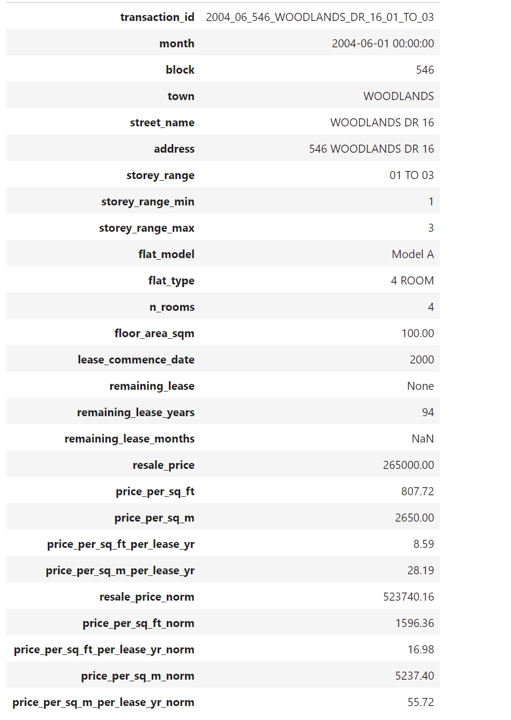

<div class="h3"><i>Adding Locations to Each Transaction</i></div>  

While we could have used a service like Google to geocode each transaction based on the address, this would involve a cost for the number of unique addresses we were trying to geocode. Instead, we opted to use our scraped postal code dataset which had geometry data for every postal code in Singapore. In order to match on address strings between the two datasets, we opted to create a new shortened address in the postal code dataset using common short forms in the resale transactions address fields (e.g. ‘drive’ to ‘dr', 'avenue' to 'ave'). In order to efficiently match transactions to a location, we opted to do this via a JOIN in our database which reduced the processing time to 3 minutes from hours in Python.


<div class="h3"><i>Geospatial Queries to Engineer Location Features</i></div>  

Using the PostGIS extension in Postgres, all location data was uploaded and geospatial indexes were initialized. In order to create location features for each transaction, we created 3 main geospatial queries that can be broadly broken down as follows:

**Query 1: Sum/Count Within A Radius of a Point**
    
With each transaction as a reference point, this query would count or sum scores of all points within a certain radius of the reference point.

**Query 2: K-Nearest Neighbors By Distance From a Point**
    
For each transaction, this query would find the nearest feature (e.g. mall or hospital) by distance by returning the shortest distance.

**Query 3: Custom Distance Function With Lateral Joins**
    
We defined a custom function to calculate the distance between each transaction and a specified point based on an ID on another table. Using lateral joins, this allowed us to calculate the distance between each transaction and every conservation area (over 200) and point of interest, returning each distance as a new column. 
Using combinations of the above 3 queries, we created over 300 location features for every building in our postal code dataset which are summarized in the following table:

    
    



<img align="center" width="1300" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/aaa.png">

    

<!-- ![image.png](attachment:image.png)


<img align="center" width="500"  src="attachment:image.png">

     -->
 
    


<div class="h3"><i>Full Features For Every Transaction</i></div>  
Finally, we joined (in our database) each resale transaction to location features on building_id we had initially created in our postal code dataset, giving us our final dataset which had all transactions from 1990 to 2022 (early March), each with transaction data, a location (geometry point) as well as location features, resulting in over 350 columns per transaction. The combined dataset is available in the view resale_location_features. 

    


<div class="h3"><i>Dealing with Categorical Variables</i></div>  

We opted to transform categorical variables outside of the database and while processing the data, we identified flat_type and town as categorical variables and used one hot encoding with drop one (town: Ang Mo Kio, flat_type: 1_room) to re-encode these features. 




<div class="h3"><i>Location Features Value-Add</i></div>  

To identify if the location features we engineered added value, we opted to run simple linear regressions with and without the additional location features to isolate these effects before proceeding to build more complex models. We were cognizant of the effects of multicollinearity in our data and ran two sets of analysis, one with removing features with high multicollinearity (as measured by VIF) and the other leaving everything in. Overall, we found that our added location features did indeed add value to our models and we were confident with using them to build more complex models. The summary of our results is shown in the table below:

    
    




<img align="center" width="1100" height="1100" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/bbb.png">
    

    
    

<br>

<div class="h2"><i>6. &ensp; Models and Analysis</i></div>  


<div class="h3"><i>Splitting Our Time Series Data</i></div>  

While we had transaction data that ran from 1990, we were cognizant of the fact that there was no time element to our location features.   Adding a time element to some location features was not only close to impossible (data not available that far back) but also raised a lot of other questions.  

For instance, some location features, such as restaurants, may not have been in existence for the full duration of our resale transaction data.  Using the same example, another possibility is that the restaurant moved during the period between 1990 to present. Another question to consider is whether merely announcement of a feature sufficient to impact prices prior to the feature actually being built ? While not the perfect solution, we took the following steps to address these concerns:


1. Our features are generally features that are long lasting and not specific (i.e. supermarkets vs a supermarket chain), and typically get replaced with a similar feature


2. Shortening our period of analysis to 15 years where most of these features would have already been built/announced


3. Some features do not typically change over time such as hospitals and police or fire stations. As a result, we opted to use only 40% of our data starting from 2007 to 2022, with a rough 60-20-20 train/validate/test split by years for our analysis with the training data being the early years and the test data being the later years.





<div class="h3"><i>Choosing the Final Model</i></div>  

Initial random forest regression baseline modeling was performed (on the non-location features, with these [results](https://github.com/mcmanus-git/Singapore-HDB/raw/main/tom/final_ML_model_results_wrapup/random_forest_regression_baseline_results.pdf)), and accuracy was somewhat lacking, we tested more and determined adding the location features for sure would boost accuracy at least 10%. 

Confident that location features add value to the analysis, we next proceeded to explore more complex models that could better describe the data as well as provide some interpretability of the results and predictions. We initially tested Support Vector Machines (SVM) but they not only suffered from long training times but were not outperforming simpler linear regressions.  


Next we tested baseline decision trees and ensembles (Random Forest/Ada Boost/Gradient Boosting) without hyper-parameter tuning which proved to be much better than linear regressions and SVMs. These methods returned R<sup>2</sup> of 91.3% on average on training and 73.3 % on average on the test sets, with random forest and gradient boosting performing the best. We finally opted to go with gradient boosting regressors as we felt that they provided the optimal trade-off between training time and performance and <mark>went with the XGBoost package as it allowed us to tune and train models faster with GPU</mark>. 




<img align="center" width="1200" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/ccc.png">

    


<div class="h3"><i>Advantages of Utilizing XGBoost</i></div>  

* XGBoost allows GPU support for both training and SHAP acceleration. 


* Although XGBoost training and prediction can be accelerated with CUDA-capable GPUs (allowing approximately 6X - 8X faster training vs conventional CPU), it should be noted that it gave *slightly* different results than the CPU-trained model. These differences were usually at the fourth decimal point level, but they did exist. After research we determined this was normal, and that after the dataset size reaches a certain size, this difference begins. 


* GPUs are critical
  * Why is this important ? 
    * Because hyperparameter tuning methods such as GridSearch are inherently brute force, so any edge in training time is a massive advantage, especially for tuning in our case as much as we needed
 


* We used the latest version of XGBoost (`version 1.6.0`), which contains improvements and full coverage of experimental categorical data support. Metric calculation is now performed in double precision.  XGBoost now uses double for GPU Hist node sum, which improves the accuracy of our `gpu_hist`.



 
<div class="h3"><i>Dealing with Data Leaks and Multicollinearity</i></div>  

As interpretation of coefficients was initially a key focus, we identified that we had strong multicollinearity in our features and in early analysis removed them from our data. However, as we moved deeper into the analysis and on to trees and ensembles our attention turned less to multicollinearity and instead to performance and opted to use as many features as possible. Inadvertently, we ended up including two variables (size and remaining lease years) that were used to derive our target variable which created data leakage. These two features were eventually removed from our final model which we put into production.  

In our initial analysis, we found that dealing with multicollinearity created a trade-off between model performance and interpretability and we opted to focus on building a model with high predictive power and did not address multicollinearity in our data by removing the features. Ultimately, this had a limited effect on prediction tasks but we need to be more cautious when interpreting features. 
 
 

The final set of features were as follows:
 - Conservation Area Map, Eating Establishments, Fire Stations, Hawker Centers, HDB Carpark Information, HDB Property Information
 - Hotels, Kindergartens, LTA MRT Station Exit, NParks Parks, Parks, Pre-Schools Location, Private Education Institutions,
 - School Directory and Information, SDCP MRT Station Point, Singapore Police Force Establishments, Supermarkets.


 
<div class="h3"><i>Tuning XGBoost Model for Production</i></div>  

Using GridSearchCV, we tuned our XGBoost model using a wide and narrow approach to hyperparameters tuning (first search with a wide range then search around the optimal from the first search). 

When optimizing for R<sup>2</sup> we found these to be the optimal settings: 

```python:
max_depth = 3
min_child_weight = 4
gamma = 11
subsample = 0.5
colsample_bytree = 0.5
reg_alpha = 100
reg_lambda = 1
n_estimators = 3000
learning_rate = 0.1
```

Our model returned an R<sup>2</sup> of 90.9% for train and 72.6% for test. We recognize that these are lower than the results of the untrained trees and ensembles but that is because they contain the features that cause the data leak. Including the leak features, we have a test R<sup>2</sup> of just under 80%. 





<img align="center" width="750" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/table_ml_1.png
">

    
    

 
<div class="h3"><i>Using SHAP to add model interpretability</i></div>  

With the model trained we turned to SHAP to get model interpretability. SHAP builds on Shapley values (a concept from game theory) and ultimately attempts to quantify the contribution that each feature brings to the prediction made by the model. We opted to use the waterfall plot as we felt it provided the clearest and cleanest explanation of each prediction.





<img align="center" width="750" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/shap_attack.png">

The waterfall plot highlights the top 15 features of the model and their effects on the predicted price versus the average predicted price of our model using SHAP values. Blue bars represent features that the model predicts to have a negative effect versus the average predicted price while red bars represent features that the model predicts as having a positive effect with the effect size in price per square meter per lease year. 



<div class="h3"><i>Addressing and Dealing with Overfitting</i></div>  


With an almost 18% difference in train vs test Rˆ2 - the model is overfitting despite significant regulation applied. Looking deeper into the data, we found that splitting the data by train-validate-test led to some overfitting because the most recent years have been affected heavily by inflation due to the Covid-19 pandemic:





<img align="center" width="600" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/green_rain.jpg">

    

The average price paid (<font color='red'>red line</font>) has seen a sharp uptick (in the later years) with an increase in the number of outliers on the high end of prices.  

As these are prices already normalized for inflation, this suggests that people are paying up for the same set of features in recent years.  

Nevertheless, to address the overfit, we switched from GridSearch to RandomSearch using Hyperopt but were not able to fully complete tuning but early indications suggest that the overfitting can be dealt with despite the worse performance of RandomSearch in the previous table. We hope to build on this in future.



<div class="h3"><i>Overall Observations</i></div>  




**Overall Observations**:
- Overfitting in models is ***very*** common at the beginning and it is critical to identify (if the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model most likely has overfit the training set). Tuning all models was necessary due to the number of features we utilized.  


* Although random forest regression can lead to high accuracy, appears robust against outliers, and works well with non-linear data, there <u>is</u> a cost.  In general they take a fair amount of time to train, and are not always a great fit for linear methods with a lot of sparse features.   Given that our dataset's original features (prior to adding in the location features) were not too high in count, we were able to do a *vast* amount of training and tuning of the random forest regression model on it; allowing us to start with RandomizedSearchCV to get us close to the correct hyperparameter combinations, but then do extensive brute-force GridSearchCV searching across shorter ranges (as documented [here](https://nbviewer.org/github/mcmanus-git/Singapore-HDB/blob/main/tom/final_notebooks/nb_Rodan_part_I_of_II.ipynb)). 


* XBGoost is somewhat hard to tun (due to it having even more hyperparameters than random forest).  Alhough there are considered about six key hyperparameters, this means that performing Gridsearch for instance takes a fairly long time.  One could say that with XGBoost, the more flexible and powerful an algorithm is, the more design decisions and adjustable hyper-parameters it will have... 


- The amount of time to train the baseline model (original features) was significantly shorter than training the model with all of the geolocation features (which was a feature value roughly   


- We observed that in general the amount of time to train and tune the Random Forest Regression model was significantly longer than using the XGBoost model 


- In addition, we observed that the amount of time to train or tune a model was proportional to the number of estimators / trees for our models, meaning we couuld lower it for some parts of testing.  


- Plotting trained model feature importances (such as [this](https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/feature_importances_random_forest_regressor.svg)) is extremely helpful into seeing the factors at play in the tuning stage.  Assigning an importance 'score' to the input features based on how useful they are at predicting a target variable gives us valuable insight (when we dont have elements such as LinearRegression coefficients).  '



- Training a model, [sweeping](https://nbviewer.org/github/mcmanus-git/Singapore-HDB/blob/main/tom/final_notebooks/nb_Ghidorah_Sweep.ipynb) manually through various hyperparameter values, and plotting the resulting MSE and R<sup>2</sup> values for the train/test/validation splits provided insight especially into observing **regularization** attempt to neuralize overfitting. 




<br>

<div class="h2"><i>7. &ensp; Limitations and Further Research</i></div>  



<div class="h3"><i>Robustness of Model</i></div>  
    
It should be understood that there are various financial and real-estate market forces at play over the years during our data’s extended time range. As such, predicting future resale prices will not be perfectly robust against data drift.
 
Particular limits worth mentioning:
 - Elements such as location features vary over time
   - Location features may have moved
   - Location features may have been created
   - Location features may have been removed


<br>

 
<div class="h3"><i>Further Investigation and Research</i></div>  


Some additional areas we plan on researching and investigating:
    
**Modified Distance** - Potentially adding a modification of the straight-line geo-spatial distance features in 'Manhattan' form (i.e. [taxi-cab](https://en.wikipedia.org/wiki/Taxicab_geometry) / city-block geometry). Singapore is a very walkable city, and distances from the HDB flat to nearby feature locations (such as hospitals, etc) many times are only possible via sidewalk or city streets. We also have examined adding potentially in the future a feature of the total travel time (whether walking or driving) to go from the flat to the specific destination location.  


**Crime Data** - Overlaying another set of features associated with historical crime (similar to NY city’s [statistics](https://www1.nyc.gov/site/nypd/stats/crime-statistics/citywide-crime-stats.page)) is an option. Although crime is extremely low in Singapore, it may be interesting to see if this is a factor in resale pricing values. 


**PLH (Prime Location Housing)** - Scenarios where there are no HDBs there currently (and this is direct from HDB, not a resale transaction). PLH is a new scheme of housing that was recently launched which includes more restrictions when it comes to resale. The [concept](https://www.channelnewsasia.com/singapore/keppel-club-bto-hdb-plh-model-how-much-property-analysts-2623251) would be that one could say that a resale could potentially fetch a certain dollar amount based on the machine learning model, allowing a mapping from HDB to appreciation of another set amount. This new housing model for public flats in prime areas includes owners of BTO flats in those areas facing a 10-year minimum occupation period; these flats will be priced with additional subsidies; those who sell their BTO units will have to pay back HDB a percentage of the resale price. The resale buyer criteria for these units will be tighter than for typical resale units…  

**Unsupervised Clustering** - Deeper dive into clustering  

**Interactivity** - Plan to investigate adding more features to the front-end application, including additional drop-down menus



<br>

<div class="h2"><i>8. &ensp; The Application / Front-End</i></div>  



<div class="h3"><i>Overview</i></div>  

To help purchasers gain transparency in their flat purchase, we developed an application which allows users to input their HDB flat’s information and receive an estimated resale price. On the landing page users can then input their flat’s address location and other information to leverage our model in predicting current Singapore resale price. Explanations of how the model works is provided to the users on the **Results** page along with estimated resale price and which particular features impact the resale price and by what quantifiable amount. Future iterations of the app will also include not only the flat’s location, but also the locatio of the location of the features impacting the unit’s cost all together on the map. This will enable our users to visually identify which features are impacting their unit’s cost.


<br>


<div class="h3"><i>Infrastructure and Tooling</i></div>  

Our app is built using [Plotly Dash](https://plotly.com/dash/) which is built on top of the Flask Python library as a back-end infrastructure. Leveraging the AWS RDS we are able to make full connection to our data sources and model to provide users insights.  The web app is hosted on [Heroku](https://www.heroku.com/) and is available to use worldwide. Some limitations of this current infrastructure include low memory limit due to Heroku's free tier program. In some instances, this memory limitation causes the results landing page to appear blank when loaded. Upon refresh of the results page, the information will be loaded properly. Another limitation to this approach is the read time of the database queries which, prior to us creating a read replica in the United States, caused HTTP response timeouts. Further tuning of the database table supplying search results and proper indexing will further reduce this load time.
Other tools included in the development of the web app include [OpenStreetMap](https://www.openstreetmap.org/#map=5/38.007/-95.844), and [MapBox](https://www.mapbox.com/) APIs which are used to render the base map and then the Plotly graphing library is used to overlay scatter plots on the map. Using [PostGIS](https://postgis.net/) geometry calculations we are able to pinpoint each flat location by its distance to the address searched by the customer.


<br>


<div class="h3"><i>Technical Workflow of the Application</i></div>  


When the customer launches the application they simply provide their HDB flat’s information on the landing page, we utilize OpenStreetMap API to identify the latitude and longitude of the searched address and query the PostGIS database infrastructure in the back end to calculate the HDB flat closest to the search location.  Search results are then displayed on the page to allow the user to confirm our search recommendation.  The customer then follows the link provided by the search results and the features they've input will be run through our model to create a resale price prediction on the results landing page. On the results landing page, the user is provided a map indicating the HDB flat location utilizing MapBox and Plotly. Below the map, the user is provided the total estimated resale price of their flat in addition to price per square meter. Below the predicted prices, the customer can also see a waterfall chart indicating which features impact the resale price value the most which utilizes SHAP values output from our model. Also provided is a brief explanation of how our model works so users can be well informed about how our estimated resale price is calculated. 

    

<br>

<div class="h2"><i>9. &ensp; Statement of Work</i></div>  


Work breakout was distributed in the following manner:

<br>



<div class="h4"><i>Michael</i></div>

> *Data gathering, cleaning, and pipelining into the database.  Initial database creation.  Webapp development and hosting.*


<div class="h4"><i>Stuart</i></div>
 
> *Data gathering, cleaning, and pipelining into the database.  Second/current database creation. XGBoost Model creation and validation. Blog.*


<div class="h4"><i>Tom</i></div>

> *Exploratory Data Analysis (EDA). Creation of baseline Random Forest Regression model.  Blog.*
 
 
 

<br>

<div class="h2"><i>10. &ensp; Appendix</i></div>  


<div class="h3"><i>A.1 &ensp; Database Tables and Views</i></div>

An extensive amount of work was done creating the database tables and views.  The end-result was a vast amount of data that could be used to do enormous amounts of geospatial joins and queries.  Enclosed are the final database views:


<img align="center" width="500" src="https://raw.githubusercontent.com/mcmanus-git/Singapore-HDB/main/tom/final_images/black_line.png">
  

<div class="h3"><i>A.2 &ensp; ML Code Model Output Example</i></div>

```python

# Final Dataset (including location features): 


# Current Model: 

# --- R2 Scores ---
Train:       0.962 
Validation:  0.897
Test:        0.795
    
#  --- MSE --- 
Train:       11.153
Validation:  40.907 
Test:        71.863
    
    
# Model Output Results:

--- Test Set ---
Mean Absolute Error: ... 6.078747834396562
Mean Squared Error:..... 67.18
RMSE: .................. 8.196381335337657
Coeff of det (R^2):..... 0.809 (1.4 % better)   

--- Val Set ---
Mean Absolute Error: ... 4.498476271962494
Mean Squared Error:..... 38.02  
RMSE: .................. 6.166026942280251
Coeff of det (R^2):..... 0.904 (0.7 % better)   

--- Train Set ---
Mean Absolute Error: ... 2.339212417385334
Mean Squared Error:..... 10.24
RMSE: .................. 3.200258043072929
Coeff of det (R^2):..... 0.965
    
    
# New Model Hyperparameters (XGBoost-based)
    max_depth=7
    min_child_weight=6
    gamma = 10
    subsample=0.75
    colsample_bytree = 0.5
    reg_alpha = 100
    reg_lambda = 1
    n_estimators=800  (can add more if desired)
    learning_rate=0.16
    seed=42
    tree_method='gpu_hist
```

<div class="h3"><i>A.3 &ensp; References</i></div>

<a id="1">[1]</a> 
Four-floor HDP flat diagram image - 
https://blog.carousell.com/property/hdb-flat-types-singapore/#hdb3


<a id="2">[2]</a> 
researchgate.net/publication/329910161 (ref) -
[image link](https://www.researchgate.net/publication/329910161/figure/fig1/AS:707705744392193@1545741606532/Example-of-Singapores-public-housing-HDB-2.jpg)


<a id="3">[3]</a> 
Singapore straitstimes/s3fs-public - 
[image link](https://static1.straitstimes.com.sg/s3fs-public/styles/large30x20/public/articles/2019/08/06/nm-hdbresale-0608.jpg)

<a id="4">[4]</a> 
Singapore Rail Network - Land Transport Authority (LTA) [image link](
https://www.lta.gov.sg/content/dam/ltagov/getting_around/public_transport/rail_network/pdf/tel2_sm-20-03-en-exp.pdf)

<a id="5">[5]</a> 
History SG [article link](https://eresources.nlb.gov.sg/history/events/d8fea656-d86e-4658-9509-974225951607#:~:text=To%20ensure%20a%20better%20racial,each%20block%20was%2025%20percent.)

<div class="h3"><i>A.4 &ensp; AcrGIS Map of Singapore</i></div>

*arcGIS view if needed, alllowing view of layers as needed, for familiarity with the area: [LINK](https://www.arcgis.com/apps/mapviewer/index.html?webmap=90a6084f84134b13a463168b9dee30d9&extent=103.4982,1.2289,103.9586,1.4936)*

In [8]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython import display

In [9]:
%%HTML

<style type="text/css">  

div.h1 {
 color: white;
 background-image: linear-gradient(120deg, #155799, #159957);
 text-align: center;  
 /* original:  text-align: center; */ 
 padding:9px;
 /* removing this: padding-right: 100px; */
 font-size: 23px;  
 max-width: 1500px;  
 margin: auto; 
 margin-top: 40px;}                                   
       
div.h2 {
    color: #4ABF72;  
    font-size: 23px; 
    margin-top: 20px; 
    margin-bottom:6px;
       }
                                   
                                   
div.h3 {
    color: #4ABF72;  
    font-size: 19px; 
    margin-top: 20px; 
    margin-bottom:6px;
       }
                               
div.h4 {
    color: #4ABF72; 
    font-size: 17px; 
    margin-top: 20px; 
    margin-bottom: 5px;
}
    
body {font-size: 10px;}   
                                       
span.note {
    font-size: 5; 
    color: gray; 
    font-style: italic;
}
                                       
hr {display: block; 
    color: gray
    height: 1px; 
    border: 0; 
    border-top: 1px solid;}
                                     
hr.light {display: block; 
          color: lightgray
          height: 1px; 
          border: 0; 
          border-top: 1px solid;}   
                                   
table.dataframe th 
{
    border: 1px darkgray solid;
    color: black;
      <table align="left">
    ...
  </table>
    background-color: white;
}
                                   
table.dataframe td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 10px;
    text-align: center;
} 
   
                                   
table.rules th 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 10px;
    align: left;
}
                                            
table.rules td 
{
    border: 1px darkgray solid;
    color: black;
    background-color: white;
    font-size: 13px;
    text-align: center;
} 
                                                                           
table.rules tr.best
{
    color: green;
}    
    
                                      
.output { 
    align-items: center; 
    /* changed from align-items: left; */
}
        
                                      
.output_png {
    display: table-cell;
    text-align: left;
    margin:auto;
}                                          
                                                                                                                               
</style>  